In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/x.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CM

In [2]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
import plotly.io as pio
pio.renderers.default='kaggle'
import warnings
warnings.filterwarnings("ignore")

In [3]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [4]:
train_1=pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt",sep="\s+",header=None)
train_2=pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt",sep="\s+",header=None)

In [5]:
# column_names=["engine", "cycle", "setting1", "setting2", "setting3", "sensor1", 
#               "sensor2", "sensor3", "sensor4", "sensor5", "sensor6", "sensor7", 
#               "sensor8", "sensor9", "sensor10", "sensor11", "sensor12", "sensor13",
#               "sensor14", "sensor15", "sensor16", "sensor17", "sensor18", "sensor19", "sensor20", "sensor21"]

index_name = ["Engine Number", "Times/ in cycle"]
setting_name = ["Altitude(Setting_1)", "Mach Number(Setting_2)", "TRA(Setting_3)"]
sensor_name = ["Total Fan inlet temperature", "Total LPC outlet temperature", "Total HPC outlet temperature", "Total LPT outlet temperature",
            "Total Fan inlet pressure","Total bypass-duct pressure", "Total HPC outlet pressure", "Physical fan speed", "Physical core speed","Engine pressure ratio(P50/P2)", "Static HPC outlet pressure",
            "Ratio of fuel flow to Ps30", "Corrected fan speed", "Corrected core speed", "Bypass Ratio", "Burner fuel-air ratio", "Bleed enthalpy", "Required fan speed", "Required fan conversion speed",
            "HPT coolant bleed", "LPT coolant bleed"]

column_names=index_name+setting_name+sensor_name
column_names

['Engine Number',
 'Times/ in cycle',
 'Altitude(Setting_1)',
 'Mach Number(Setting_2)',
 'TRA(Setting_3)',
 'Total Fan inlet temperature',
 'Total LPC outlet temperature',
 'Total HPC outlet temperature',
 'Total LPT outlet temperature',
 'Total Fan inlet pressure',
 'Total bypass-duct pressure',
 'Total HPC outlet pressure',
 'Physical fan speed',
 'Physical core speed',
 'Engine pressure ratio(P50/P2)',
 'Static HPC outlet pressure',
 'Ratio of fuel flow to Ps30',
 'Corrected fan speed',
 'Corrected core speed',
 'Bypass Ratio',
 'Burner fuel-air ratio',
 'Bleed enthalpy',
 'Required fan speed',
 'Required fan conversion speed',
 'HPT coolant bleed',
 'LPT\xa0coolant\xa0bleed']

In [6]:
train_1.columns=column_names
train_2.columns=column_names

In [7]:
display(train_1.head())

,Engine Number,Times/ in cycle,Altitude(Setting_1),Mach Number(Setting_2),TRA(Setting_3),Total Fan inlet temperature,Total LPC outlet temperature,Total HPC outlet temperature,Total LPT outlet temperature,Total Fan inlet pressure,Total bypass-duct pressure,Total HPC outlet pressure,Physical fan speed,Physical core speed,Engine pressure ratio(P50/P2),Static HPC outlet pressure,Ratio of fuel flow to Ps30,Corrected fan speed,Corrected core speed,Bypass Ratio,Burner fuel-air ratio,Bleed enthalpy,Required fan speed,Required fan conversion speed,HPT coolant bleed,LPT coolant bleed
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,1.02,42.02,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,1.02,42.20,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,9.02,175.71,1915.11,8001.42,0.94,36.69,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,5.71,138.46,2211.58,8303.96,1.02,41.96,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,9.03,175.05,1915.10,7993.23,0.94,36.89,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


In [8]:
display(train_2.head())

,Engine Number,Times/ in cycle,Altitude(Setting_1),Mach Number(Setting_2),TRA(Setting_3),Total Fan inlet temperature,Total LPC outlet temperature,Total HPC outlet temperature,Total LPT outlet temperature,Total Fan inlet pressure,Total bypass-duct pressure,Total HPC outlet pressure,Physical fan speed,Physical core speed,Engine pressure ratio(P50/P2),Static HPC outlet pressure,Ratio of fuel flow to Ps30,Corrected fan speed,Corrected core speed,Bypass Ratio,Burner fuel-air ratio,Bleed enthalpy,Required fan speed,Required fan conversion speed,HPT coolant bleed,LPT coolant bleed
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [9]:
train_1.shape,train_2.shape

((53759, 26), (61249, 26))

In [10]:
display(train_1.describe().T)
display(train_2.describe().T)

,count,mean,std,min,25%,50%,75%,max
Engine Number,53759.0,131.082981,74.463862,1.0000,68.0000,131.0000,195.0000,260.0000
Times/ in cycle,53759.0,109.154746,69.180569,1.0000,52.0000,104.0000,157.0000,378.0000
Altitude(Setting_1),53759.0,23.998407,14.747376,0.0000,10.0046,25.0013,41.9980,42.0080
Mach Number(Setting_2),53759.0,0.572056,0.310016,0.0000,0.2507,0.7000,0.8400,0.8420
TRA(Setting_3),53759.0,94.046020,14.237735,60.0000,100.0000,100.0000,100.0000,100.0000
Total Fan inlet temperature,53759.0,472.910207,26.389707,445.0000,445.0000,462.5400,491.1900,518.6700
Total LPC outlet temperature,53759.0,579.672399,37.289399,535.5300,549.5700,555.9800,607.3400,644.5200
Total HPC outlet temperature,53759.0,1419.971013,105.946341,1243.7300,1352.7600,1369.1800,1499.3700,1612.8800
Total LPT outlet temperature,53759.0,1205.442024,119.123428,1023.7700,1123.6550,1138.8900,1306.8500,1439.2300
Total Fan inlet pressure,53759.0,8.031986,3.613839,3.9100,3.9100,7.0500,10.5200,14.6200


,count,mean,std,min,25%,50%,75%,max
Engine Number,61249.0,124.325181,71.995350,1.0000,60.0000,126.0000,185.0000,249.0000
Times/ in cycle,61249.0,134.311417,89.783389,1.0000,62.0000,123.0000,191.0000,543.0000
Altitude(Setting_1),61249.0,23.999823,14.780722,0.0000,10.0046,25.0014,41.9981,42.0080
Mach Number(Setting_2),61249.0,0.571347,0.310703,0.0000,0.2507,0.7000,0.8400,0.8420
TRA(Setting_3),61249.0,94.031576,14.251954,60.0000,100.0000,100.0000,100.0000,100.0000
Total Fan inlet temperature,61249.0,472.882435,26.436832,445.0000,445.0000,462.5400,491.1900,518.6700
Total LPC outlet temperature,61249.0,579.420056,37.342647,535.4800,549.3300,555.7400,607.0700,644.4200
Total HPC outlet temperature,61249.0,1417.896600,106.167598,1242.6700,1350.5500,1367.6800,1497.4200,1613.0000
Total LPT outlet temperature,61249.0,1201.915359,119.327591,1024.4200,1119.4900,1136.9200,1302.6200,1440.7700
Total Fan inlet pressure,61249.0,8.031626,3.622872,3.9100,3.9100,7.0500,10.5200,14.6200


In [11]:
display(train_1.info())
display(train_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Engine Number                  53759 non-null  int64  
 1   Times/ in cycle                53759 non-null  int64  
 2   Altitude(Setting_1)            53759 non-null  float64
 3   Mach Number(Setting_2)         53759 non-null  float64
 4   TRA(Setting_3)                 53759 non-null  float64
 5   Total Fan inlet temperature    53759 non-null  float64
 6   Total LPC outlet temperature   53759 non-null  float64
 7   Total HPC outlet temperature   53759 non-null  float64
 8   Total LPT outlet temperature   53759 non-null  float64
 9   Total Fan inlet pressure       53759 non-null  float64
 10  Total bypass-duct pressure     53759 non-null  float64
 11  Total HPC outlet pressure      53759 non-null  float64
 12  Physical fan speed             53759 non-null 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Engine Number                  61249 non-null  int64  
 1   Times/ in cycle                61249 non-null  int64  
 2   Altitude(Setting_1)            61249 non-null  float64
 3   Mach Number(Setting_2)         61249 non-null  float64
 4   TRA(Setting_3)                 61249 non-null  float64
 5   Total Fan inlet temperature    61249 non-null  float64
 6   Total LPC outlet temperature   61249 non-null  float64
 7   Total HPC outlet temperature   61249 non-null  float64
 8   Total LPT outlet temperature   61249 non-null  float64
 9   Total Fan inlet pressure       61249 non-null  float64
 10  Total bypass-duct pressure     61249 non-null  float64
 11  Total HPC outlet pressure      61249 non-null  float64
 12  Physical fan speed             61249 non-null 

None

In [12]:
print(train_1.isnull().sum())
print(train_2.isnull().sum())

Engine Number                    0
Times/ in cycle                  0
Altitude(Setting_1)              0
Mach Number(Setting_2)           0
TRA(Setting_3)                   0
Total Fan inlet temperature      0
Total LPC outlet temperature     0
Total HPC outlet temperature     0
Total LPT outlet temperature     0
Total Fan inlet pressure         0
Total bypass-duct pressure       0
Total HPC outlet pressure        0
Physical fan speed               0
Physical core speed              0
Engine pressure ratio(P50/P2)    0
Static HPC outlet pressure       0
Ratio of fuel flow to Ps30       0
Corrected fan speed              0
Corrected core speed             0
Bypass Ratio                     0
Burner fuel-air ratio            0
Bleed enthalpy                   0
Required fan speed               0
Required fan conversion speed    0
HPT coolant bleed                0
LPT coolant bleed                0
dtype: int64
Engine Number                    0
Times/ in cycle                  0
Altitud

In [13]:
print((train_1.duplicated()==1).sum())
print((train_2.duplicated()==1).sum())

0
0


In [14]:
display(train_1.head())
display(train_2.head())

,Engine Number,Times/ in cycle,Altitude(Setting_1),Mach Number(Setting_2),TRA(Setting_3),Total Fan inlet temperature,Total LPC outlet temperature,Total HPC outlet temperature,Total LPT outlet temperature,Total Fan inlet pressure,Total bypass-duct pressure,Total HPC outlet pressure,Physical fan speed,Physical core speed,Engine pressure ratio(P50/P2),Static HPC outlet pressure,Ratio of fuel flow to Ps30,Corrected fan speed,Corrected core speed,Bypass Ratio,Burner fuel-air ratio,Bleed enthalpy,Required fan speed,Required fan conversion speed,HPT coolant bleed,LPT coolant bleed
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,1.02,42.02,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,1.02,42.20,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,9.02,175.71,1915.11,8001.42,0.94,36.69,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,5.71,138.46,2211.58,8303.96,1.02,41.96,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,9.03,175.05,1915.10,7993.23,0.94,36.89,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


,Engine Number,Times/ in cycle,Altitude(Setting_1),Mach Number(Setting_2),TRA(Setting_3),Total Fan inlet temperature,Total LPC outlet temperature,Total HPC outlet temperature,Total LPT outlet temperature,Total Fan inlet pressure,Total bypass-duct pressure,Total HPC outlet pressure,Physical fan speed,Physical core speed,Engine pressure ratio(P50/P2),Static HPC outlet pressure,Ratio of fuel flow to Ps30,Corrected fan speed,Corrected core speed,Bypass Ratio,Burner fuel-air ratio,Bleed enthalpy,Required fan speed,Required fan conversion speed,HPT coolant bleed,LPT coolant bleed
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


#### Features
"engine" : Engine No.

"cycle" : Time, In Cycles #### 2. Setting Names:

"setting1" : Operation Setting 1

"setting2" : Operation Setting 2

"setting3" : Operation Setting 3 #### 3. Sensor Names:

"sensor1" : Fan Inlet Temperature (◦R)

"sensor2" : LPC Outlet Temperature (◦R)

"sensor3" : HPC Outlet Temperature (◦R)

"sensor4" : LPT Outlet Temperature (◦R)

"sensor5" : Fan Inlet Pressure (psia)

"sensor6" : Bypass-Duct Pressure (psia)

"sensor7" : HPC Outlet Pressure (psia)

"sensor8" : Physical Fan Speed (rpm)

"sensor9" : Physical Core Speed (rpm)

"sensor10" : Engine Pressure Ratio(P50/P2)

"sensor11" : HPC Outlet Static Pressure (psia)

"sensor12" : Ratio of Fuel Flow to Ps30 (pps/psia)

"sensor13" : Corrected Fan Speed (rpm)

"sensor14" : Corrected Core Speed (rpm)

"sensor15" : Bypass Ratio

"sensor16" : Burner Fuel-Air Ratio

"sensor17" : Bleed Enthalpy

"sensor18" : Required Fan Speed

"sensor19" : Required Fan Conversion Speed

"sensor20" : High-Pressure Turbines Cool Air Flow

"sensor21" : Low-Pressure Turbines Cool Air Flow

In [15]:
display(train_1.nunique())
print("\n")
display(train_2.nunique())

Engine Number                      260
Times/ in cycle                    378
Altitude(Setting_1)                536
Mach Number(Setting_2)             105
TRA(Setting_3)                       2
Total Fan inlet temperature          6
Total LPC outlet temperature      1590
Total HPC outlet temperature     12305
Total LPT outlet temperature     15411
Total Fan inlet pressure             6
Total bypass-duct pressure          14
Total HPC outlet pressure         2067
Physical fan speed                 897
Physical core speed              22434
Engine pressure ratio(P50/P2)        9
Static HPC outlet pressure         681
Ratio of fuel flow to Ps30        1672
Corrected fan speed                514
Corrected core speed             14905
Bypass Ratio                      8464
Burner fuel-air ratio                2
Bleed enthalpy                      53
Required fan speed                   6
Required fan conversion speed        2
HPT coolant bleed                  510
LPT coolant bleed        

Engine Number                      249
Times/ in cycle                    543
Altitude(Setting_1)                536
Mach Number(Setting_2)             105
TRA(Setting_3)                       2
Total Fan inlet temperature          6
Total LPC outlet temperature      1704
Total HPC outlet temperature     13558
Total LPT outlet temperature     17353
Total Fan inlet pressure             6
Total bypass-duct pressure          46
Total HPC outlet pressure         5926
Physical fan speed                1038
Physical core speed              25297
Engine pressure ratio(P50/P2)       21
Static HPC outlet pressure         737
Ratio of fuel flow to Ps30        5627
Corrected fan speed                483
Corrected core speed             15938
Bypass Ratio                     11915
Burner fuel-air ratio                2
Bleed enthalpy                      54
Required fan speed                   6
Required fan conversion speed        2
HPT coolant bleed                  652
LPT coolant bleed        

In [16]:
display(train_1[["Engine Number","Times/ in cycle"]].groupby("Times/ in cycle").max())
display(train_2[["Engine Number","Times/ in cycle"]].groupby("Times/ in cycle").max())

,Engine Number
Times/ in cycle,
1,260
2,260
3,260
4,260
5,260
...,...
374,112
375,112
376,112


,Engine Number
Times/ in cycle,
1,249
2,249
3,249
4,249
5,249
...,...
539,118
540,118
541,118


In [17]:
print(train_1["Times/ in cycle"].max())
print(print(train_2["Times/ in cycle"].max()))

378
543
None


In [18]:
# fig = px.bar(x=train_1["Engine Number"], y=train_1["Times/ in cycle"])
# fig.show()

In [18]:
df1=train_1.groupby('Engine Number')[['Times/ in cycle']].max()
df1[df1['Times/ in cycle'] == df1['Times/ in cycle'].max()]

,Times/ in cycle
Engine Number,
112,378


In [19]:
df2=train_2.groupby('Engine Number')[['Times/ in cycle']].max()
df2[df2['Times/ in cycle'] == df2['Times/ in cycle'].max()]

,Times/ in cycle
Engine Number,
118,543


In [20]:
def Calculate_RUL(df):
    max_cycles = df.groupby('Engine Number')['Times/ in cycle'].max()
    merged = df.merge(max_cycles.to_frame(name='max_time_cycle'), left_on='Engine Number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['Times/ in cycle']
    merged = merged.drop("max_time_cycle", axis=1)
    return merged

In [21]:
train_1=Calculate_RUL(train_1)
train_2=Calculate_RUL(train_2)

In [22]:
print(train_1.columns)
print(train_2.columns)

Index(['Engine Number', 'Times/ in cycle', 'Altitude(Setting_1)',
       'Mach Number(Setting_2)', 'TRA(Setting_3)',
       'Total Fan inlet temperature', 'Total LPC outlet temperature',
       'Total HPC outlet temperature', 'Total LPT outlet temperature',
       'Total Fan inlet pressure', 'Total bypass-duct pressure',
       'Total HPC outlet pressure', 'Physical fan speed',
       'Physical core speed', 'Engine pressure ratio(P50/P2)',
       'Static HPC outlet pressure', 'Ratio of fuel flow to Ps30',
       'Corrected fan speed', 'Corrected core speed', 'Bypass Ratio',
       'Burner fuel-air ratio', 'Bleed enthalpy', 'Required fan speed',
       'Required fan conversion speed', 'HPT coolant bleed',
       'LPT coolant bleed', 'RUL'],
      dtype='object')
Index(['Engine Number', 'Times/ in cycle', 'Altitude(Setting_1)',
       'Mach Number(Setting_2)', 'TRA(Setting_3)',
       'Total Fan inlet temperature', 'Total LPC outlet temperature',
       'Total HPC outlet temperature', 'T

In [23]:
display(train_1.corr())
display(train_2.corr())

,Engine Number,Times/ in cycle,Altitude(Setting_1),Mach Number(Setting_2),TRA(Setting_3),Total Fan inlet temperature,Total LPC outlet temperature,Total HPC outlet temperature,Total LPT outlet temperature,Total Fan inlet pressure,Total bypass-duct pressure,Total HPC outlet pressure,Physical fan speed,Physical core speed,Engine pressure ratio(P50/P2),Static HPC outlet pressure,Ratio of fuel flow to Ps30,Corrected fan speed,Corrected core speed,Bypass Ratio,Burner fuel-air ratio,Bleed enthalpy,Required fan speed,Required fan conversion speed,HPT coolant bleed,LPT coolant bleed,RUL
Engine Number,1.000000,0.014608,-0.003084,-0.005160,0.004777,0.001659,0.003531,0.006220,0.007947,0.002592,0.003033,0.003528,0.004669,0.003368,0.006838,0.009307,0.003562,0.004748,0.001573,-0.004108,0.010823,0.006432,0.004695,0.004777,0.003119,0.003103,0.014608
Times/ in cycle,0.014608,1.000000,0.000039,0.000750,-0.005057,-0.001011,0.003753,0.024635,0.037108,-0.000516,-0.000691,-0.003254,-0.004035,0.022238,-0.004292,0.042219,-0.003088,-0.004331,0.071592,0.035143,0.067857,0.025085,-0.004642,-0.005057,-0.006865,-0.006766,-0.733383
Altitude(Setting_1),-0.003084,0.000039,1.000000,0.943005,-0.028488,-0.964414,-0.867452,-0.787862,-0.840737,-0.987344,-0.976459,-0.951622,-0.444419,-0.776655,-0.827911,-0.605517,-0.951201,-0.028653,-0.263387,0.460837,-0.838749,-0.790552,-0.443924,-0.028488,-0.962036,-0.962058,0.001135
Mach Number(Setting_2),-0.005160,0.000750,0.943005,1.000000,-0.065350,-0.884061,-0.808822,-0.759658,-0.836673,-0.932606,-0.928264,-0.917853,-0.439033,-0.752442,-0.885541,-0.622257,-0.917718,-0.065437,-0.355461,0.520009,-0.888615,-0.762704,-0.438600,-0.065350,-0.920772,-0.920777,0.000047
TRA(Setting_3),0.004777,-0.005057,-0.028488,-0.065350,1.000000,0.164334,0.480073,0.620839,0.544563,0.113635,0.198092,0.306989,0.902746,0.634739,0.508645,0.800034,0.308334,0.999998,0.927377,-0.884175,0.295212,0.617185,0.902999,1.000000,0.276544,0.276479,0.005761
Total Fan inlet temperature,0.001659,-0.001011,-0.964414,-0.884061,0.164334,1.000000,0.944089,0.870963,0.898002,0.986372,0.986424,0.973142,0.572652,0.861836,0.826591,0.706111,0.972867,0.164474,0.352782,-0.542743,0.793789,0.873265,0.572171,0.164334,0.977703,0.977718,-0.000023
Total LPC outlet temperature,0.003531,0.003753,-0.867452,-0.808822,0.480073,0.944089,1.000000,0.982225,0.981047,0.915808,0.944072,0.968620,0.810662,0.978554,0.905135,0.895735,0.968828,0.480202,0.623963,-0.777953,0.805280,0.983065,0.810312,0.480073,0.962425,0.962416,-0.004928
Total HPC outlet temperature,0.006220,0.024635,-0.787862,-0.759658,0.620839,0.870963,0.982225,1.000000,0.989565,0.842951,0.884795,0.929054,0.895718,0.997806,0.928979,0.960683,0.929534,0.620970,0.751865,-0.875928,0.804821,0.998680,0.895446,0.620839,0.917144,0.917125,-0.026942
Total LPT outlet temperature,0.007947,0.037108,-0.840737,-0.836673,0.544563,0.898002,0.981047,0.989565,1.000000,0.884242,0.919684,0.956731,0.843956,0.987319,0.961586,0.936763,0.957146,0.544693,0.715493,-0.846726,0.859130,0.990213,0.843647,0.544563,0.946478,0.946469,-0.040978
Total Fan inlet pressure,0.002592,-0.000516,-0.987344,-0.932606,0.113635,0.986372,0.915808,0.842951,0.884242,1.000000,0.996311,0.979787,0.524331,0.832968,0.843905,0.673774,0.979487,0.113778,0.330514,-0.525384,0.824095,0.845626,0.523827,0.113635,0.985714,0.985727,-0.000758


,Engine Number,Times/ in cycle,Altitude(Setting_1),Mach Number(Setting_2),TRA(Setting_3),Total Fan inlet temperature,Total LPC outlet temperature,Total HPC outlet temperature,Total LPT outlet temperature,Total Fan inlet pressure,Total bypass-duct pressure,Total HPC outlet pressure,Physical fan speed,Physical core speed,Engine pressure ratio(P50/P2),Static HPC outlet pressure,Ratio of fuel flow to Ps30,Corrected fan speed,Corrected core speed,Bypass Ratio,Burner fuel-air ratio,Bleed enthalpy,Required fan speed,Required fan conversion speed,HPT coolant bleed,LPT coolant bleed,RUL
Engine Number,1.000000,-0.003656,0.000171,-0.001140,0.003334,0.001516,0.002333,0.002521,0.001785,0.001064,0.001419,0.001939,0.003423,0.003650,0.002127,0.002493,0.001931,0.003360,0.006958,-0.004081,-0.000835,0.002462,0.003400,0.003334,0.001782,0.001788,-0.003656
Times/ in cycle,-0.003656,1.000000,0.000301,0.001033,-0.001814,-0.000688,0.002504,0.023167,0.029306,-0.000489,-0.001291,0.004971,-0.001056,0.028468,0.015330,0.036907,0.005094,-0.000922,0.097872,-0.027760,0.044364,0.022909,-0.001803,-0.001814,0.002463,0.002475,-0.610620
Altitude(Setting_1),0.000171,0.000301,1.000000,0.943796,-0.028425,-0.964754,-0.868390,-0.787848,-0.839988,-0.987382,-0.976518,-0.951582,-0.444728,-0.776800,-0.823819,-0.605412,-0.951158,-0.028443,-0.263960,0.460800,-0.840823,-0.790694,-0.444336,-0.028425,-0.962043,-0.962052,-0.002380
Mach Number(Setting_2),-0.001140,0.001033,0.943796,1.000000,-0.066257,-0.886123,-0.811613,-0.761372,-0.837055,-0.933693,-0.929548,-0.919006,-0.440914,-0.754337,-0.882565,-0.623179,-0.918868,-0.066236,-0.356085,0.520309,-0.902160,-0.764491,-0.440552,-0.066257,-0.922004,-0.922000,-0.002280
TRA(Setting_3),0.003334,-0.001814,-0.028425,-0.066257,1.000000,0.163835,0.478659,0.620181,0.544482,0.113471,0.197793,0.306687,0.902625,0.634634,0.514065,0.798813,0.308038,0.999998,0.928067,-0.881196,0.290752,0.616473,0.902830,1.000000,0.276239,0.276147,0.002303
Total Fan inlet temperature,0.001516,-0.000688,-0.964754,-0.886123,0.163835,1.000000,0.944439,0.870606,0.897421,0.986561,0.986539,0.973191,0.572469,0.861569,0.823653,0.705775,0.972915,0.163834,0.353450,-0.542375,0.789447,0.872955,0.572078,0.163835,0.977777,0.977791,0.001889
Total LPC outlet temperature,0.002333,0.002504,-0.868390,-0.811613,0.478659,0.944439,1.000000,0.981750,0.980722,0.916509,0.944587,0.968979,0.809878,0.978305,0.904535,0.894876,0.969187,0.478666,0.624368,-0.776156,0.800320,0.982621,0.809591,0.478659,0.962824,0.962806,-0.004443
Total HPC outlet temperature,0.002521,0.023167,-0.787848,-0.761372,0.620181,0.870606,0.981750,1.000000,0.989744,0.842817,0.884586,0.929013,0.895268,0.998190,0.929839,0.960787,0.929499,0.620227,0.755184,-0.875041,0.801512,0.998693,0.895021,0.620181,0.917055,0.917020,-0.032924
Total LPT outlet temperature,0.001785,0.029306,-0.839988,-0.837055,0.544482,0.897421,0.980722,0.989744,1.000000,0.883579,0.919064,0.956314,0.843898,0.987901,0.961264,0.937163,0.956736,0.544531,0.719325,-0.846000,0.858554,0.990407,0.843615,0.544482,0.945999,0.945965,-0.045881
Total Fan inlet pressure,0.001064,-0.000489,-0.987382,-0.933693,0.113471,0.986561,0.916509,0.842817,0.883579,1.000000,0.996316,0.979719,0.524506,0.832973,0.840662,0.673610,0.979416,0.113473,0.331134,-0.525064,0.824766,0.845583,0.524096,0.113471,0.985677,0.985696,0.001679


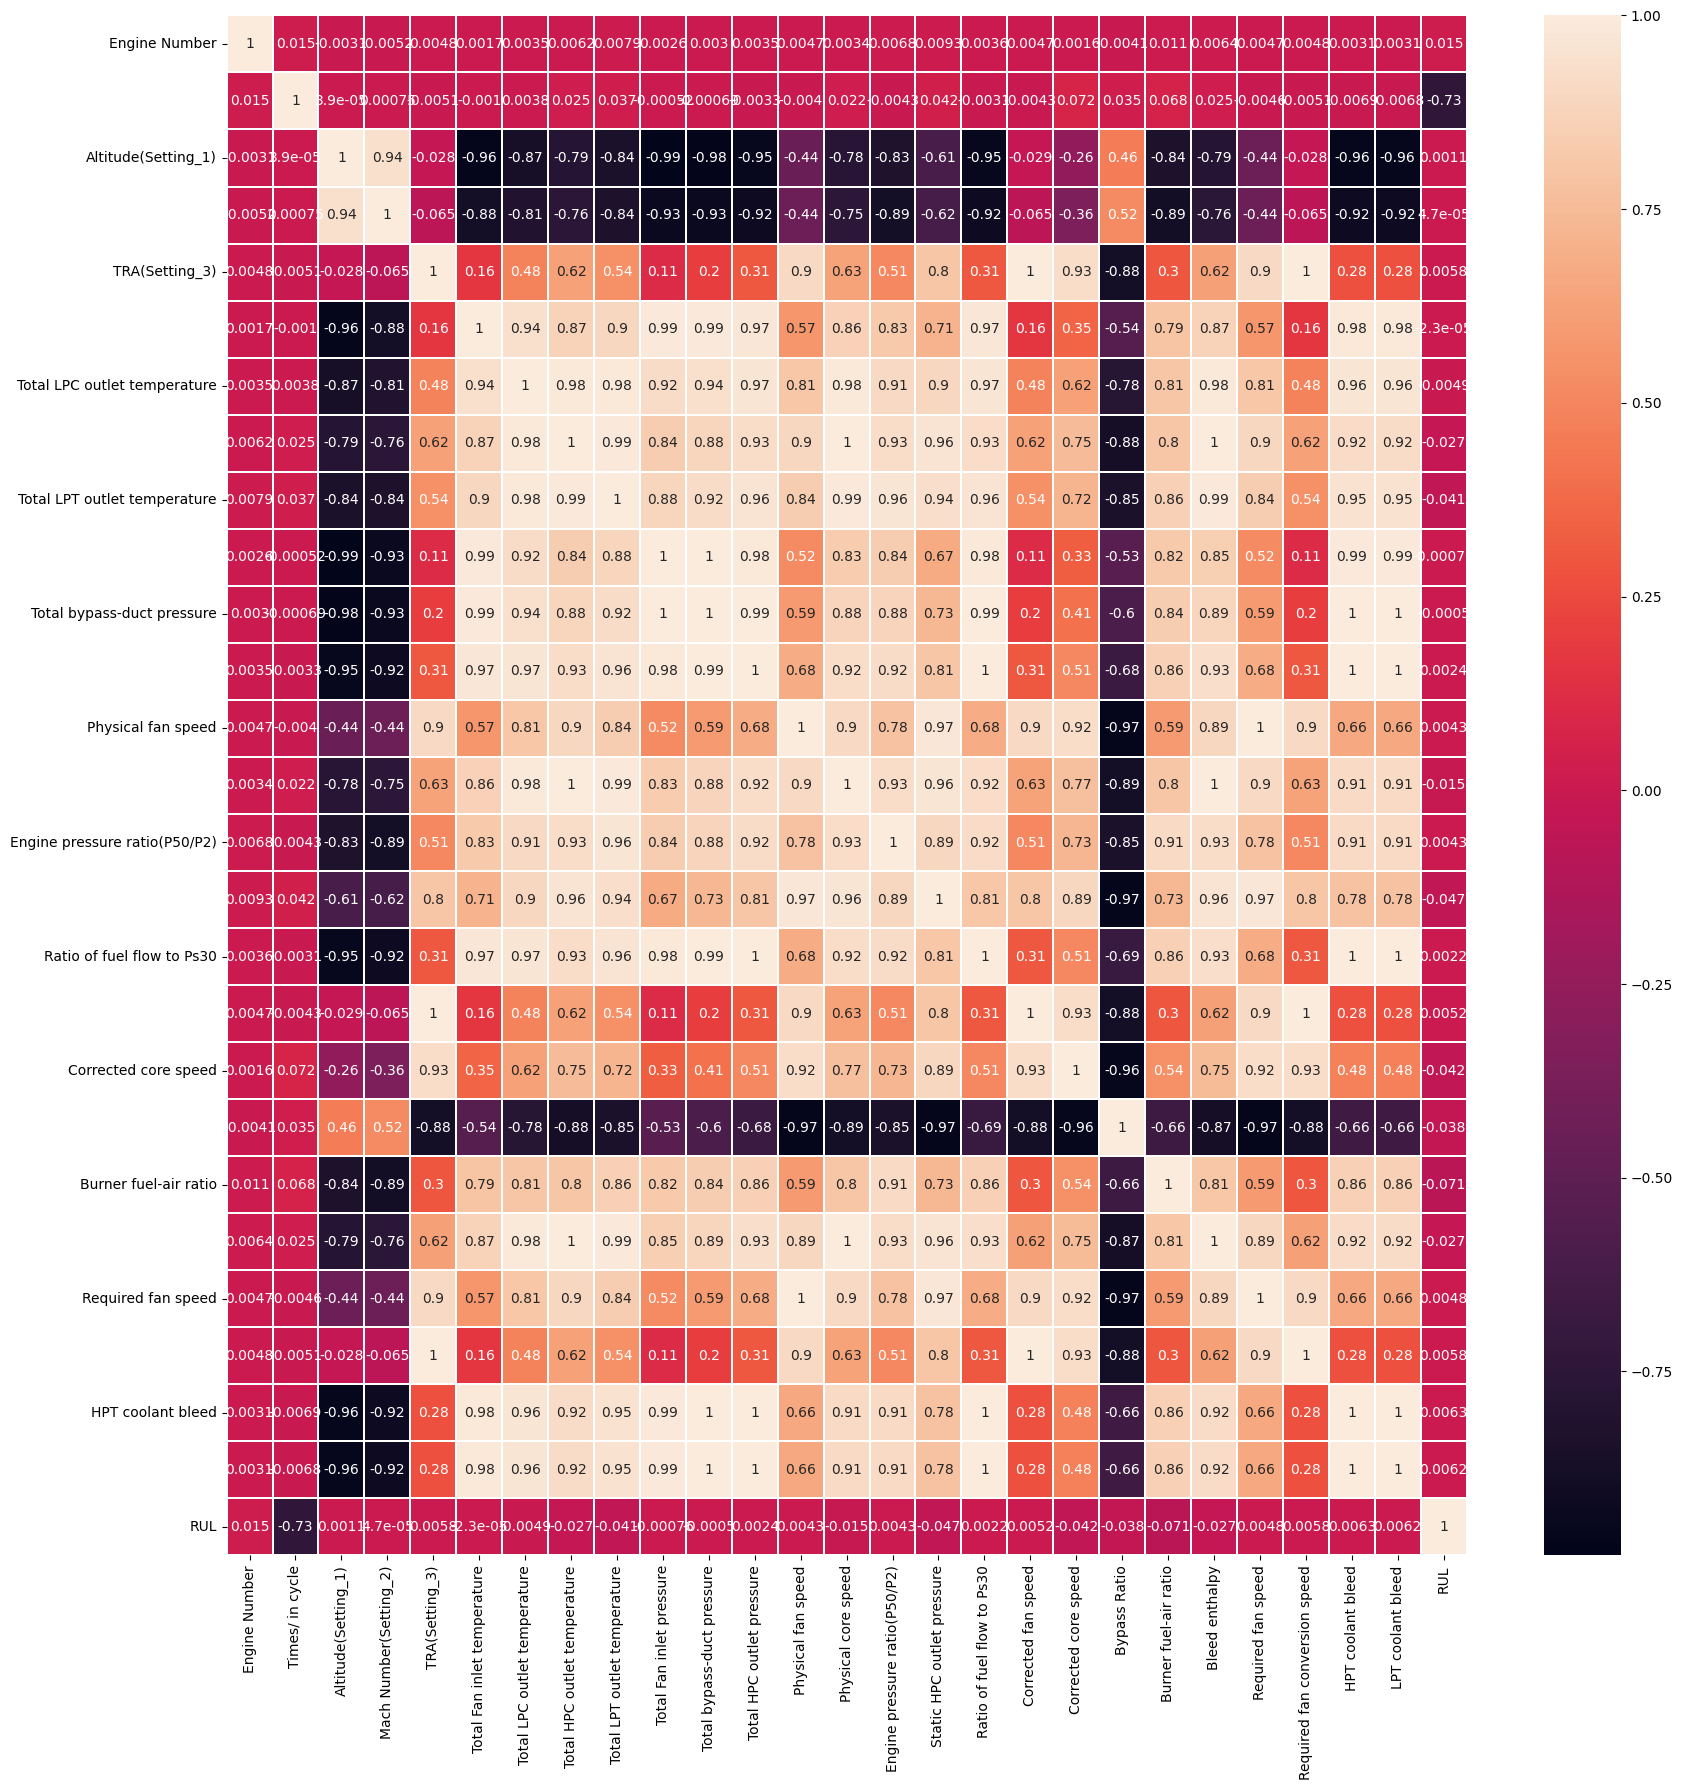

In [24]:
sns.heatmap(train_1.corr(),annot=True,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

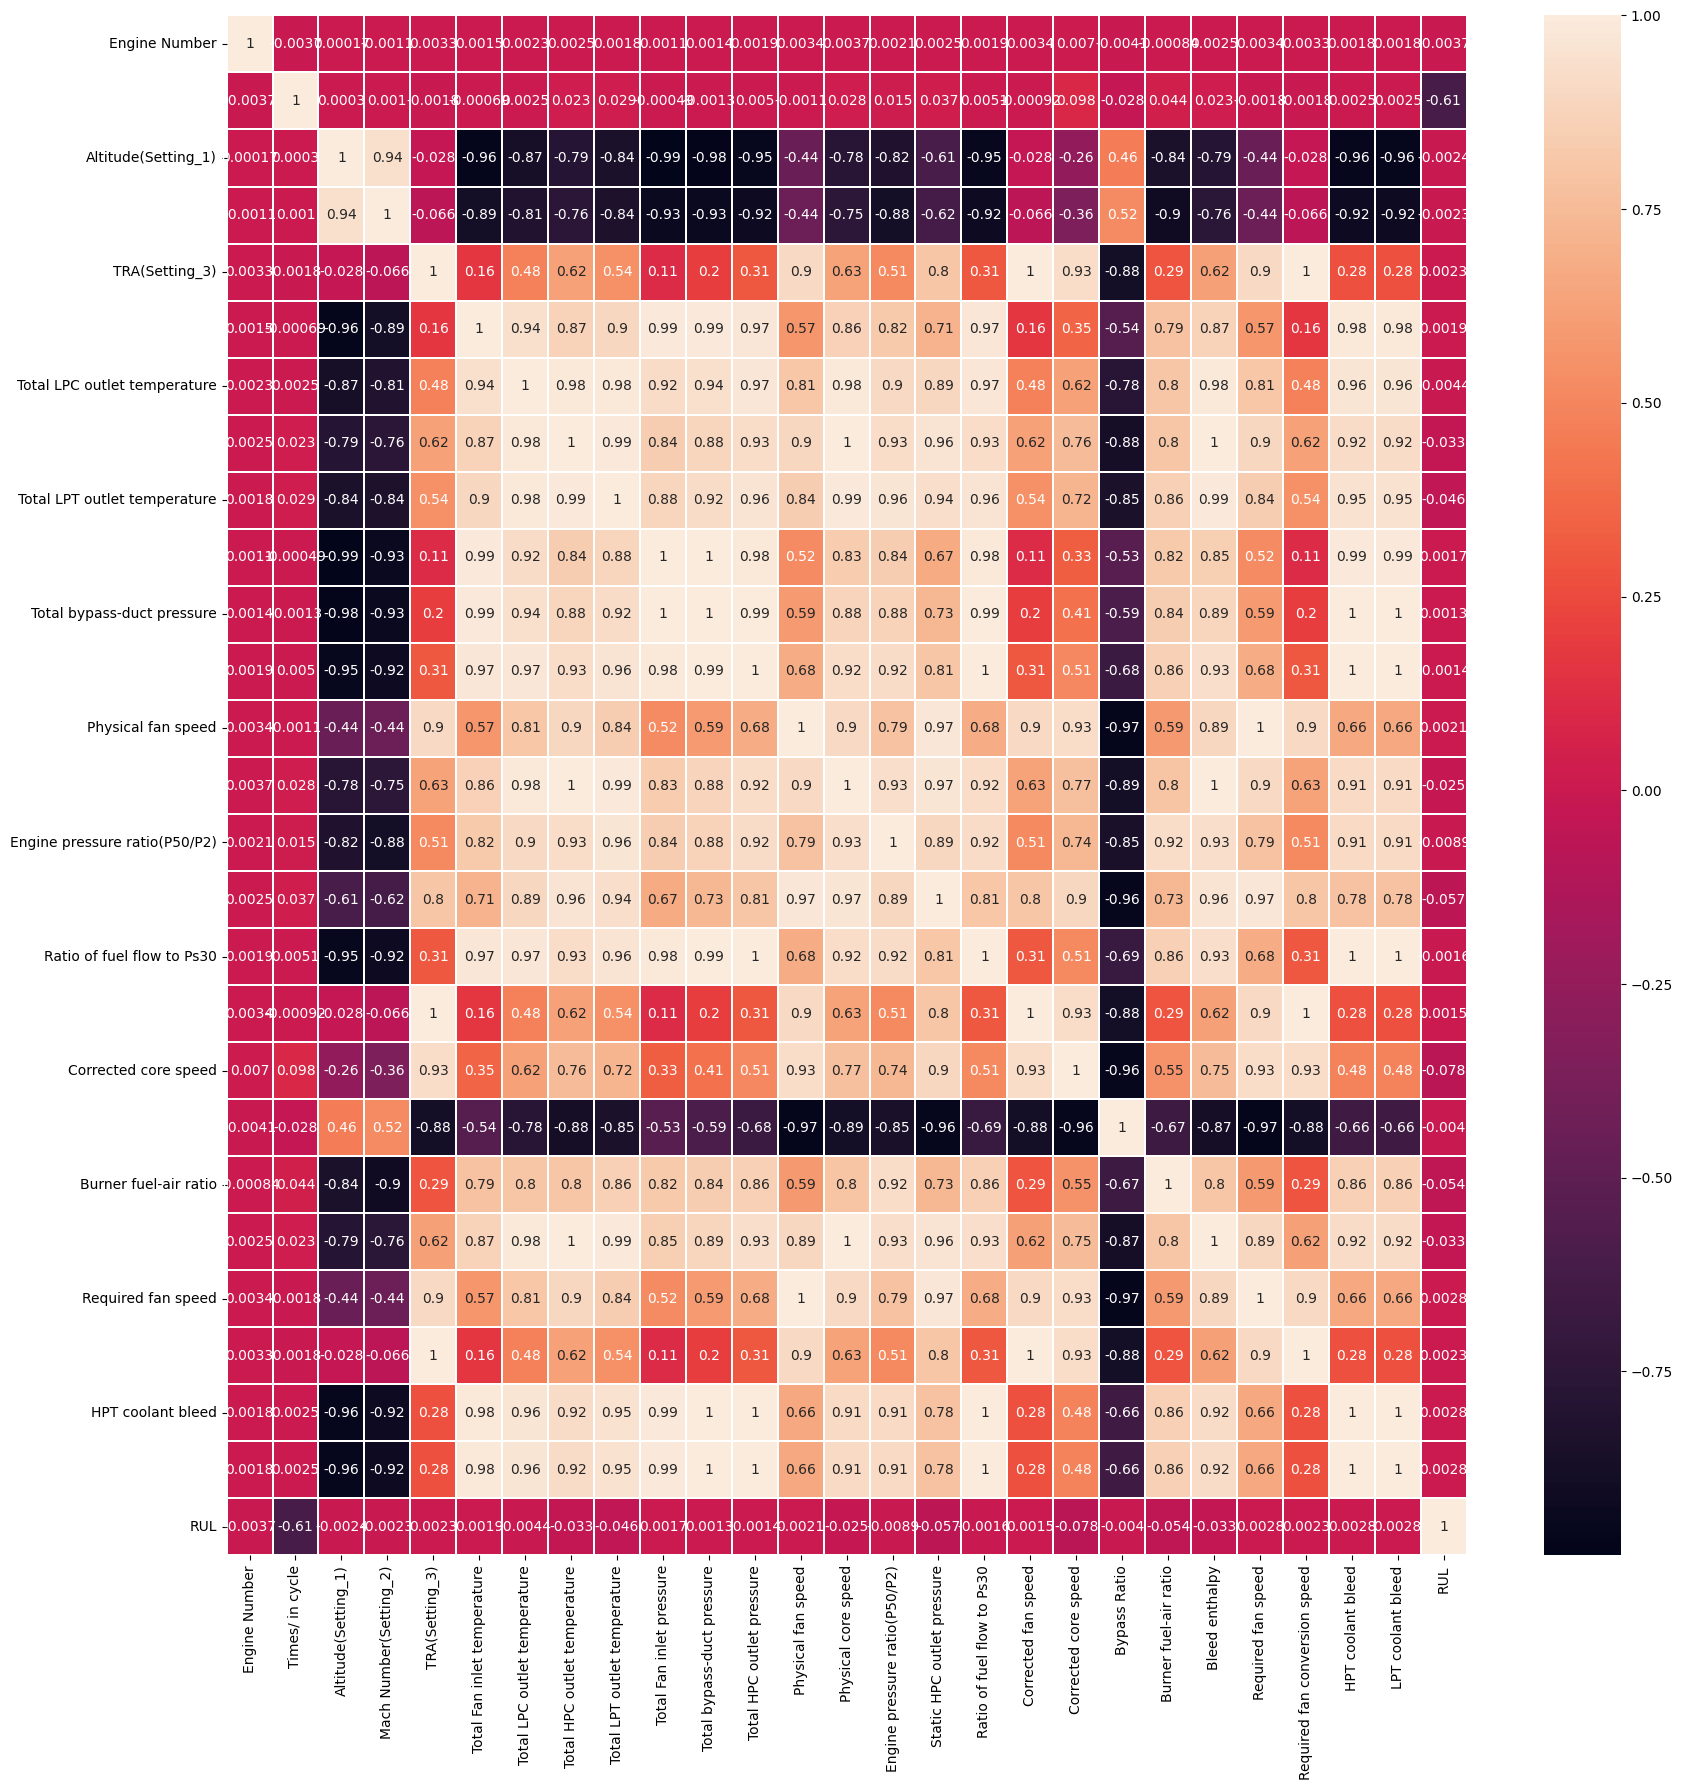

In [25]:
sns.heatmap(train_2.corr(),annot=True,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [26]:
# def box_plot(df,col):
#     fig=px.box(df,x=col)
#     fig.show()

In [ ]:
# sensors_1=train_1.drop(columns=['Engine Number', 'Times/ in cycle', 'RUL'],axis=1)
# sensors_1=sensors_1.columns

# for sensor_1 in sensors_1:
#     box_plot(train_1,sensor_1)

In [ ]:
# sensors_2=train_2.drop(columns=['Engine Number', 'Times/ in cycle', 'RUL'],axis=1)
# sensors_2=sensors_2.columns

# for sensor_2 in sensors_2:
#     box_plot(train_2,sensor_2)

In [ ]:
# def remove_outliers(col):
#     q1 = col.quantile(0.25)
#     q3 = col.quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     col_filtered = col[(col > lower_bound) & (col < upper_bound)]
#     return col_filtered

In [ ]:
# def impute_median(col):
#     col = col.copy() 
#     q1 = col.quantile(0.25)
#     q3 = col.quantile(0.75)
#     iqr = q3 - q1
    
#     lower_bound = q1 - (1.5 * iqr)
#     upper_bound = q3 + (1.5 * iqr)
    
#     col[col < lower_bound] = col.median() 
#     col[col > upper_bound] = col.median()
    
#     return col



In [27]:
# columns_with_outlier_train_1=["Physical fan speed","Static HPC outlet pressure","Corrected fan speed","Corrected core speed","Bypass Ratio","Required fan speed","Required fan conversion speed"]
sensors_1=train_1.drop(columns=['Engine Number', 'Times/ in cycle', 'RUL'],axis=1)
sensors_1=sensors_1.columns
for col in sensors_1:
    q1 = train_1[col].quantile(0.25)
    q3 = train_1[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    train_1.loc[train_1[col] < lower_bound, col] = np.nan
    train_1.loc[train_1[col] > upper_bound, col] = np.nan

In [28]:
train_1=train_1.dropna()

In [29]:
train_1.shape

(44067, 27)

In [30]:
train_1.isnull().sum()

Engine Number                    0
Times/ in cycle                  0
Altitude(Setting_1)              0
Mach Number(Setting_2)           0
TRA(Setting_3)                   0
Total Fan inlet temperature      0
Total LPC outlet temperature     0
Total HPC outlet temperature     0
Total LPT outlet temperature     0
Total Fan inlet pressure         0
Total bypass-duct pressure       0
Total HPC outlet pressure        0
Physical fan speed               0
Physical core speed              0
Engine pressure ratio(P50/P2)    0
Static HPC outlet pressure       0
Ratio of fuel flow to Ps30       0
Corrected fan speed              0
Corrected core speed             0
Bypass Ratio                     0
Burner fuel-air ratio            0
Bleed enthalpy                   0
Required fan speed               0
Required fan conversion speed    0
HPT coolant bleed                0
LPT coolant bleed                0
RUL                              0
dtype: int64

In [31]:
train_1.head()

,Engine Number,Times/ in cycle,Altitude(Setting_1),Mach Number(Setting_2),TRA(Setting_3),Total Fan inlet temperature,Total LPC outlet temperature,Total HPC outlet temperature,Total LPT outlet temperature,Total Fan inlet pressure,Total bypass-duct pressure,Total HPC outlet pressure,Physical fan speed,Physical core speed,Engine pressure ratio(P50/P2),Static HPC outlet pressure,Ratio of fuel flow to Ps30,Corrected fan speed,Corrected core speed,Bypass Ratio,Burner fuel-air ratio,Bleed enthalpy,Required fan speed,Required fan conversion speed,HPT coolant bleed,LPT coolant bleed,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,1.02,42.02,183.06,2387.72,8048.56,9.3461,0.02,334.0,2223.0,100.0,14.73,8.8071,148
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,1.02,42.20,130.42,2387.66,8072.30,9.3774,0.02,330.0,2212.0,100.0,10.41,6.2665,147
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,5.71,138.46,2211.58,8303.96,1.02,41.96,130.72,2387.61,8068.66,9.3528,0.02,329.0,2212.0,100.0,10.59,6.4701,145
6,1,7,42.0043,0.8409,100.0,445.00,549.74,1347.45,1127.19,3.91,5.71,138.71,2211.62,8307.75,1.02,42.19,130.49,2387.69,8075.54,9.3753,0.02,330.0,2212.0,100.0,10.62,6.4227,142
7,1,8,20.0020,0.7002,100.0,491.19,607.44,1481.69,1252.36,9.35,13.65,334.41,2323.87,8709.12,1.08,44.27,315.11,2387.99,8049.26,9.2369,0.02,365.0,2324.0,100.0,24.33,14.7989,141


In [ ]:
# columns_imputed_train_1=["setting3","sensor8","sensor11","sensor13","sensor14","sensor15","sensor19"]

# for col in columns_imputed_train_1:
#     box_plot(train_1,col)

In [32]:
# columns_with_outlier_train_2=["sensor8","sensor11","sensor13","sensor14","sensor15"]
sensors_2=train_2.drop(columns=['Engine Number', 'Times/ in cycle', 'RUL'],axis=1)
sensors_2=sensors_2.columns
for col in sensors_2:
    q1 = train_2[col].quantile(0.25)
    q3 = train_2[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    train_2.loc[train_2[col] < lower_bound, col] = np.nan
    train_2.loc[train_2[col] > upper_bound, col] = np.nan

In [33]:
train_2=train_2.dropna()

In [34]:
train_2.head()

,Engine Number,Times/ in cycle,Altitude(Setting_1),Mach Number(Setting_2),TRA(Setting_3),Total Fan inlet temperature,Total LPC outlet temperature,Total HPC outlet temperature,Total LPT outlet temperature,Total Fan inlet pressure,Total bypass-duct pressure,Total HPC outlet pressure,Physical fan speed,Physical core speed,Engine pressure ratio(P50/P2),Static HPC outlet pressure,Ratio of fuel flow to Ps30,Corrected fan speed,Corrected core speed,Bypass Ratio,Burner fuel-air ratio,Bleed enthalpy,Required fan speed,Required fan conversion speed,HPT coolant bleed,LPT coolant bleed,RUL
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330.0,2212.0,100.0,10.62,6.3670,320
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361.0,2324.0,100.0,24.37,14.6552,319
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329.0,2212.0,100.0,10.48,6.4213,318
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328.0,2212.0,100.0,10.54,6.4176,317
5,1,6,34.9996,0.8400,100.0,449.44,554.77,1352.87,1117.01,5.48,7.97,193.82,2222.77,8340.00,1.02,41.44,181.90,2387.87,8054.10,9.3346,0.02,330.0,2223.0,100.0,14.91,8.9057,315


In [ ]:
# columns_imputed_train_2=["setting3","sensor13","sensor14","sensor15","sensor19"]


# for col in columns_imputed_train_2:
#     box_plot(train_2,col)

In [35]:
from sklearn.model_selection import train_test_split

In [ ]:
# # # X1.isnull().sum()
# index_name = ["Engine Number", "Times/ in cycle"]
# setting_name = ["Altitude(Setting_1)", "Mach Number(Setting_2)", "TRA(Setting_3)"]
# sensor_name = ["Total Fan inlet temperature", "Total LPC outlet temperature", "Total HPC outlet temperature", "Total LPT outlet temperature",
#             "Total Fan inlet pressure","Total bypass-duct pressure", "Total HPC outlet pressure", "Physical fan speed", "Physical core speed","Engine pressure ratio(P50/P2)", "Static HPC outlet pressure",
#             "Ratio of fuel flow to Ps30", "Corrected fan speed", "Corrected core speed", "Bypass Ratio", "Burner fuel-air ratio", "Bleed enthalpy", "Required fan speed", "Required fan conversion speed",
#             "HPT coolant bleed", "LPT coolant bleed"

In [36]:
X1=train_1.drop(["Engine Number","Times/ in cycle","Burner fuel-air ratio","Required fan speed","Total Fan inlet temperature",
                 "Total Fan inlet pressure","Required fan conversion speed","Mach Number(Setting_2)","TRA(Setting_3)",
                 "Bleed enthalpy","Engine pressure ratio(P50/P2)","RUL"],axis=1)
y1=train_1["RUL"]
print(X1.shape)
# print(X1)
X1_train,X1_valid,y1_train,y1_valid=train_test_split(X1,y1,test_size=0.2,random_state=29)

(44067, 15)


In [35]:
X2=train_2.drop(["Engine Number","Times/ in cycle","Burner fuel-air ratio","Required fan speed","Total Fan inlet temperature",
                 "Total Fan inlet pressure","Bleed enthalpy","Engine pressure ratio(P50/P2)",
                 "Required fan conversion speed", "Mach Number(Setting_2)","TRA(Setting_3)","RUL"],axis=1)
y2=train_2["RUL"]

X2_train,X2_valid,y2_train,y2_valid=train_test_split(X2,y2,test_size=0.2,random_state=29)

In [37]:
rul_1=pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt",header=None, names=["RUL"])
rul_2=pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt",header=None, names=["RUL"])

In [38]:
test_1=pd.read_csv('/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt',sep="\s+",header=None)
test_2=pd.read_csv('/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt',sep="\s+",header=None)

<Axes: ylabel='Density'>

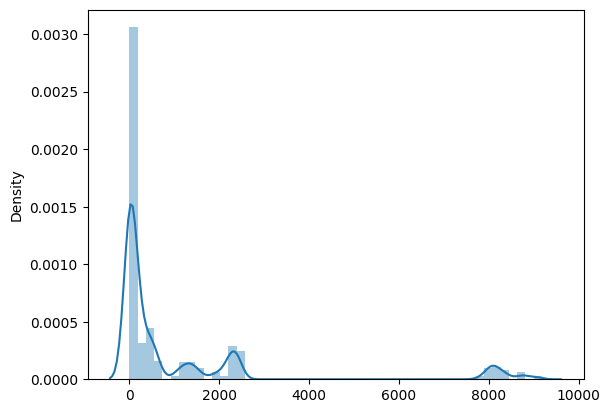

In [45]:
sns.distplot(test_1)

<Axes: ylabel='Density'>

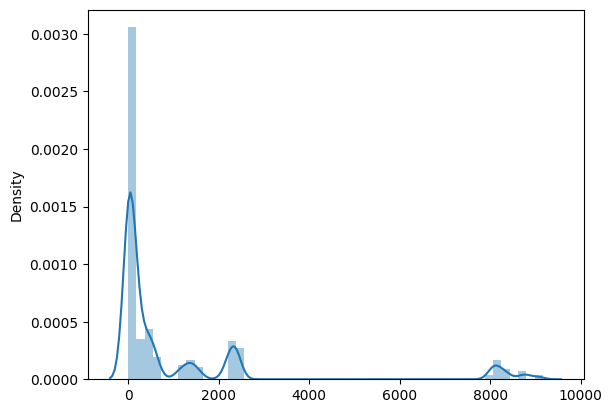

In [46]:
sns.distplot(train_1)

<Axes: xlabel='RUL', ylabel='Density'>

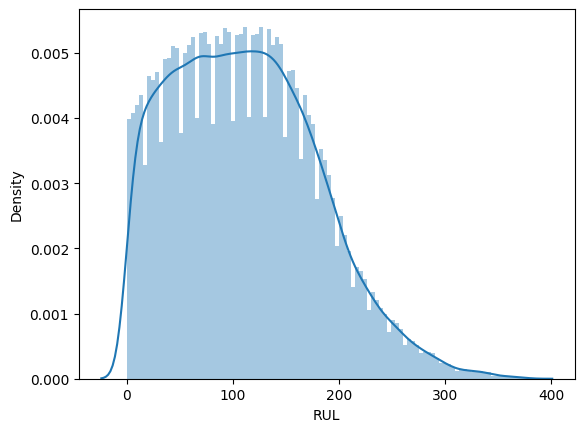

In [48]:
sns.distplot(train_1["RUL"],bins=100)

<Axes: ylabel='Density'>

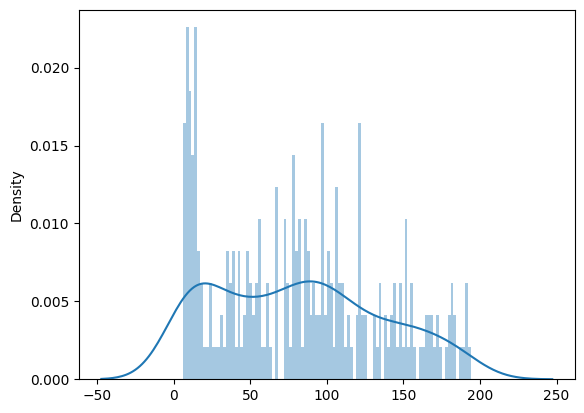

In [42]:
sns.distplot(rul_1,bins=100)

<Axes: ylabel='Density'>

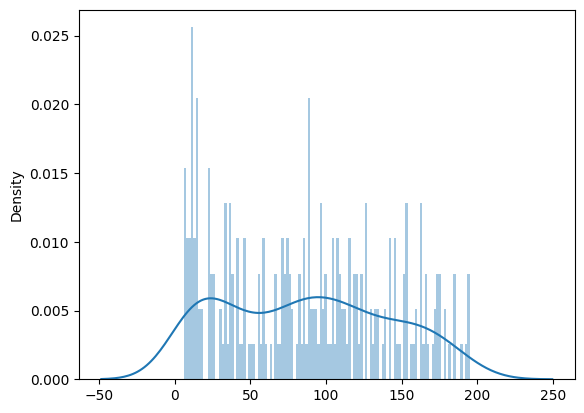

In [55]:
sns.distplot(rul_2,bins=120)

<Axes: xlabel='RUL', ylabel='Density'>

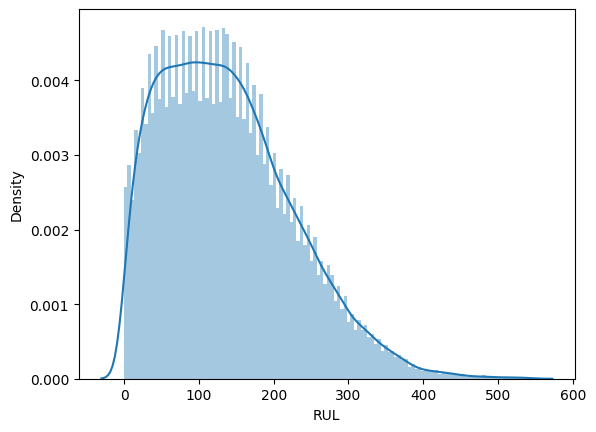

In [56]:
sns.distplot(train_2["RUL"],bins=120)

In [39]:
test_1.columns=column_names
test_2.columns=column_names

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
# scaler = MinMaxScaler()
scaler=StandardScaler()

In [42]:
## Scaling X_train1 and X_test1

scaled_train_1=scaler.fit_transform(X1_train)
scaled_valid_1=scaler.fit_transform(X1_valid)

## Conserve only the last occurence of each unit to match the length of test1

X_test= test_1.groupby('Engine Number').last().reset_index().drop(columns=["Engine Number","Times/ in cycle","Burner fuel-air ratio",
                                                                              "Required fan speed","Total Fan inlet temperature","Total Fan inlet pressure",
                                                                              "Required fan conversion speed", "Mach Number(Setting_2)",
                                                                              "Bleed enthalpy","Engine pressure ratio(P50/P2)","TRA(Setting_3)"],axis=1)

## scaling X_valid

# scaled_X_test_1=scaler.fit_transform(X_test_1)

<Axes: ylabel='Density'>

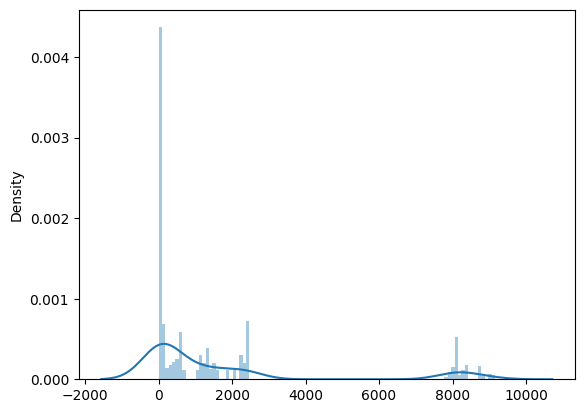

In [63]:
sns.distplot(X_test,bins=100)

In [44]:
print(f"X1_train: {X1_train.shape}")
print(f"X1_valid: {X1_valid.shape}")
print(f"y1_train: {y1_train.shape}")
print(f"y1_valid: {y1_valid.shape}")
print(f"X_test: {X_test.shape}")
print(f"rul_1: {rul_1.shape}")

# print(f"scaled_train_1: {scaled_train_1.shape}")
# print(f"scaled_valid_1: {scaled_valid_1.shape}")
print(f"scaled_X_test1: {X_test.shape}")

X1_train: (35253, 15)
X1_valid: (8814, 15)
y1_train: (35253,)
y1_valid: (8814,)
X_test: (259, 15)
rul_1: (259, 1)
scaled_X_test1: (259, 15)


In [43]:
# scaled_train_2=scaler.fit_transform(X2_train)
# scaled_valid_2=scaler.fit_transform(X2_valid)

# ## Conserve only the last occurence of each unit to match the length of test1

# X_test_2 = test_2.groupby('Engine Number').last().reset_index().drop(columns=["Engine Number","Times/ in cycle","Burner fuel-air ratio",
#                                                                               "Required fan speed","Total Fan inlet temperature","Total Fan inlet pressure",
#                                                                               "Required fan conversion speed", "Mach Number(Setting_2)",
#                                                                               "Bleed enthalpy","Engine pressure ratio(P50/P2)","TRA(Setting_3)"],axis=1)

# # scaled_X_test_2=scaler.fit_transform(X_test_2)

In [44]:
# print(f"X2_train: {X2_train.shape}")
# print(f"X2_valid: {X2_valid.shape}")
# print(f"y2_train: {y2_train.shape}")
# print(f"y2_valid: {y2_valid.shape}")
# print(f"X_test_2: {X_test_2.shape}")
# print(f"rul_2: {rul_2.shape}")

# # print(f"scaled_train_2: {train_2.shape}")
# # print(f"scaled_valid_2: {valid_2.shape}")
# print(f"scaled_X_test2: {X_test_2.shape}")

X2_train: (39744, 15)
X2_valid: (9936, 15)
y2_train: (39744,)
y2_valid: (9936,)
X_test_2: (248, 15)
rul_2: (248, 1)
scaled_X_test2: (248, 15)


In [48]:
# X_train=pd.concat([X1_train,X2_train])
# X_valid=pd.concat([X1_valid,X2_valid])
# y_train=pd.concat([y1_train,y2_train])
# y_valid=pd.concat([y1_valid,y2_valid])

# X_train.shape,X_valid.shape,y_train.shape,y_valid.shape

((74997, 15), (18750, 15), (74997,), (18750,))

In [49]:
# X_test=pd.concat([X_test_1,X_test_2])
# RUL=pd.concat([rul_1,rul_2])
# X_test=scaler.fit_transform(X_test)
# X_test.shape,RUL.shape

((507, 15), (507, 1))

In [45]:
scaled_X_train=scaler.fit_transform(X1_train)
scaled_X_valid=scaler.fit_transform(X1_valid)

In [46]:
def prediction( model, scaled_test, y_test):
    
    # Make predictions
    y_pred = model.predict(scaled_test)
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred) 
    print("MSE:", mse)
    # MSE measures the average squared difference between actual and predicted values. Lower values are better.
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE:", rmse)
    # RMSE is the square root of MSE. Measures predictive accuracy in units of the variable. Lower is better.
    
    # R-squared (R2) 
    r2 = r2_score(y_test, y_pred)
    print("R-squared:", r2)
    # R2 measures proportion of variance in actual data explained by the prediction. Values range 0 to 1. Higher is better. 
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)  
    print("MAE:", mae)
    # MAE measures average absolute difference between actual and predicted values. Lower values are better.

    return y_pred

### Model Training

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [ ]:
# def get_best_params(X_train,y_train,estimator,params,verbose=3,cv=5):
#     cv=GridSearchCV(estimator=estimator,param_grid=params,verbose=verbose,cv=cv)
#     cv.fit(X_train,y_train)
    
#     return cv.best_params_

In [68]:
hgb = HistGradientBoostingRegressor(l2_regularization=0,learning_rate=0.1,loss='poisson',max_iter=150)
hgb.fit(X1_train, y1_train)

HistGradientBoostingRegressor(l2_regularization=0, loss='poisson', max_iter=150)

In [70]:
print(f"\nHistGradientBoostingRegressor on merge data-test dataset:")
prediction(hgb, X_test, rul_1)

print(f"\nHistGradientBoostingRegressor on merge data-validation dataset:")
prediction(hgb, X1_valid,y1_valid)


HistGradientBoostingRegressor on merge data-test dataset:
MSE: 1905.1023106456191
RMSE: 43.64747771229879
R-squared: 0.34128707797505875
MAE: 29.030155531902988

HistGradientBoostingRegressor on merge data-validation dataset:
MSE: 1942.735873394231
RMSE: 44.076477552025764
R-squared: 0.5847687760280866
MAE: 32.54595021739887


array([ 95.23654587, 174.4516082 , 181.88384199, ..., 114.80182715,
        73.43986074,  84.41001896])

In [54]:
X_new_test=pd.concat([X_test,X1_valid],axis=0)
y_new_test=pd.concat([rul_1,y1_valid],axis=0)

# prediction(hgb,X_new_test,y_new_test)

In [55]:
X_whole=pd.concat([X1_train,X_new_test])
y_whole=pd.concat([y1_train,y_new_test])

In [ ]:
params_hgb={
    "loss":["squared_error","gamma","poisson","quantile"],
    "learning_rate":[0.01,0.1],
    "max_iter":[100,120,150],
    "l2_regularization":[0,1]
}

In [ ]:
cv=GridSearchCV(estimator=hgb,param_grid=params_hgb,verbose=3,cv=5,scoring="r2")
cv.fit(X_train,y_train)

In [ ]:
cv.best_params_
# {'l2_regularization': 0,
#  'learning_rate': 0.1,
#  'loss': 'poisson',
#  'max_iter': 150}

In [80]:
rf=RandomForestRegressor(criterion='poisson',max_features='sqrt',n_estimators=150,oob_score=True)
rf.fit(X1_train,y1_train)

RandomForestRegressor(criterion='poisson', max_features='sqrt',
                      n_estimators=150, oob_score=True)

In [84]:
print(f"\nHistGradientBoostingRegressor on data-test dataset:")
prediction(rf, X_test, rul_1)

print(f"\nHistGradientBoostingRegressor on data-validation dataset:")
prediction(rf, X1_valid,y1_valid)

print(f"\nHistGradientBoostingRegressor on merge data dataset:")
prediction(rf,X_new_test,y_new_test)

print(f"\nHistGradientBoostingRegressor on whole data dataset:")
prediction(rf,X_whole,y_whole)


HistGradientBoostingRegressor on data-test dataset:
MSE: 1735.8940043743087
RMSE: 41.66406130437009
R-squared: 0.399792963581325
MAE: 28.343332730689877

HistGradientBoostingRegressor on data-validation dataset:
MSE: 1926.619423500407
RMSE: 43.89327310078854
R-squared: 0.5882134301919091
MAE: 32.43858309229259

HistGradientBoostingRegressor on merge data dataset:
MSE: 1921.1749306586062
RMSE: 43.831209550485895
R-squared: 0.5872191126982766
MAE: 32.32167910864273

HistGradientBoostingRegressor on whole data dataset:
MSE: 600.7257781039251
RMSE: 24.509707833916035
R-squared: 0.8715616015096694
MAE: 16.019963029366217


array([ 77.92666667,  59.94666667, 119.84      , ..., 104.45333333,
        73.66      ,  83.9       ])

In [76]:
# params_rf={
#     "n_estimators":[100,120,150],
#     "criterion":["squared_error","friedman_mse","poisson"],
#     "max_features":["sqrt","log2"],
#     "oob_score":[True,False]
# }

In [78]:
# cv=GridSearchCV(estimator=rf,param_grid=params_rf,verbose=3,cv=5,scoring="r2")
# cv.fit(X1_train,y1_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, oob_score=True;, score=0.600 total time=  10.0s
[CV 2/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, oob_score=True;, score=0.594 total time=   9.9s
[CV 3/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, oob_score=True;, score=0.592 total time=   9.9s
[CV 4/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, oob_score=True;, score=0.582 total time=  10.0s
[CV 5/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, oob_score=True;, score=0.594 total time=   9.9s
[CV 1/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, oob_score=False;, score=0.596 total time=   9.4s
[CV 2/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, oob_score=False;, score=0.595 total time=   9.5s
[CV 3/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, 

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='friedman_mse',
                                             max_features='log2',
                                             n_estimators=150, oob_score=True),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'poisson'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 120, 150],
                         'oob_score': [True, False]},
             scoring='r2', verbose=3)

In [79]:
# cv.best_params_

{'criterion': 'poisson',
 'max_features': 'sqrt',
 'n_estimators': 150,
 'oob_score': True}

In [ ]:
# cv.best_params_
# {'criterion': 'friedman_mse',
#  'max_features': 'log2',
#  'n_estimators': 150,
#  'oob_score': True}

In [ ]:
# global_importances = pd.Series(rf1.feature_importances_, index=X1.columns)
# global_importances.sort_values(ascending=True, inplace=True)

# df = pd.DataFrame({'importance': global_importances.values,
#                    'feature': global_importances.index})

# fig = px.bar(df, x='importance', y='feature', 
#              orientation='h')

# fig.update_layout(
#     title='Global Feature Importance - Built-in Method',
#     xaxis_title='Importance', 
#     yaxis_title='Feature'
# )

# fig.show()

In [71]:
svr = SVR(kernel='rbf', C=0.021565506840327632, gamma=0.7461897008799661, epsilon=0.013467259760711999)
svr.fit(scaled_X_train, y1_train)

SVR(C=0.021565506840327632, epsilon=0.013467259760711999,
    gamma=0.7461897008799661)

In [72]:
print(f"\nsvr on data-test dataset:")
prediction(svr, X_test, rul_1)

print(f"\nsvr on data-validation dataset:")
prediction(svr, X1_valid,y1_valid)

print(f"\nsvr on merge data dataset:")
prediction(svr,X_new_test,y_new_test)

print(f"\nsvr on whole data dataset:")
prediction(svr,X_whole,y_whole)


svr on data-test dataset:
MSE: 3149.813300900076
RMSE: 56.12319752918641
R-squared: -0.08908729556145412
MAE: 47.354934044141814

svr on data-validation dataset:
MSE: 4900.207568546257
RMSE: 70.00148261677218
R-squared: -0.04734730761364747
MAE: 56.42794472027509

svr on merge data dataset:
MSE: 4850.240400540044
RMSE: 69.64366733982382
R-squared: -0.0421156887963563
MAE: 56.168944415511675

svr on whole data dataset:
MSE: 4880.110854977735
RMSE: 69.857790223981
R-squared: -0.043393917016465
MAE: 56.515657327739476


array([97.23695107, 97.23695107, 97.23695107, ..., 97.23695107,
       97.23695107, 97.23695107])

In [66]:
# Objective function for Optuna
def objective_svr(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])    
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    gamma = trial.suggest_loguniform('gamma', 1e-3, 1e3)
    epsilon = trial.suggest_loguniform('epsilon', 1e-3, 1e1)

    if kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 5)
        model = SVR(kernel=kernel, degree=degree, C=C, gamma=gamma, epsilon=epsilon) 
    else:
        model = SVR(kernel=kernel, C=C, gamma=gamma, epsilon=epsilon)
    
    # Cross-validation
    score = np.mean(cross_val_score(model, scaled_X_train, y1_train, cv=5, n_jobs=-1))  
    return score

In [70]:
# Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective_svr, n_trials=100,show_progress_bar=False)

print('Best hyperparameters:', study.best_trial.params)

[I 2024-03-03 07:27:02,774] A new study created in memory with name: no-name-1478dc56-b255-4815-82d9-30096aed5eaa
[I 2024-03-03 07:30:21,267] Trial 0 finished with value: 0.024667975092396245 and parameters: {'kernel': 'rbf', 'C': 0.012077051911166868, 'gamma': 13.160857169469413, 'epsilon': 0.1282311763039394}. Best is trial 0 with value: 0.024667975092396245.
[I 2024-03-03 07:32:27,287] Trial 1 finished with value: 0.5215032884237445 and parameters: {'kernel': 'linear', 'C': 4.5111506663668655, 'gamma': 1.4568942790257493, 'epsilon': 0.05746522729212317}. Best is trial 1 with value: 0.5215032884237445.
[I 2024-03-03 07:35:17,796] Trial 2 finished with value: 0.560570816250986 and parameters: {'kernel': 'rbf', 'C': 535.8385125066293, 'gamma': 0.013331258683179633, 'epsilon': 0.04437364438049334}. Best is trial 2 with value: 0.560570816250986.
[I 2024-03-03 07:37:16,077] Trial 3 finished with value: 0.4924758855544236 and parameters: {'kernel': 'linear', 'C': 0.6459711784399286, 'gamma

KeyboardInterrupt: 

In [ ]:
# Train model on best hyperparameters
model = SVR(**study.best_trial.params)
model.fit(X, y)

In [96]:
params_svr={
    "kernel":["poly","sigmoid","rbf"],
    "C":[1,0.5],
    "gamma":["scale","auto"],
    "epsilon":[0.1,0.01,0.5]
}

In [ ]:
cv=GridSearchCV(estimator=svr,param_grid=params_svr,verbose=3,cv=5,scoring="r2")
cv.fit(scaled_X_train,scaled_y_train)

In [ ]:
cv.best_params_

In [91]:
xgb=XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7)
xgb.fit(X1_train,y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
print(f"\nextraGradientBoostingRegressor on data-test dataset:")
prediction(xgb, X_test, rul_1)

print(f"\nextraGradientBoostingRegressor on data-validation dataset:")
prediction(xgb, X1_valid,y1_valid)

print(f"\nextraGradientBoostingRegressor on merge data dataset:")
prediction(xgb,X_new_test,y_new_test)

print(f"\neaxtraGradientBoostingRegressor on whole data dataset:")
prediction(xgb,X_whole,y_whole)


extraGradientBoostingRegressor on data-test dataset:
MSE: 4305.2290869427015
RMSE: 65.614244542955
R-squared: -0.48858673678566733
MAE: 41.040504410690325

extraGradientBoostingRegressor on data-validation dataset:
MSE: 1966.8834026931654
RMSE: 44.3495592164473
R-squared: 0.5796075967427234
MAE: 32.93010102228321

extraGradientBoostingRegressor on merge data dataset:
MSE: 2033.6343706442988
RMSE: 45.09583540244375
R-squared: 0.5630562388849925
MAE: 33.161622512153976

eaxtraGradientBoostingRegressor on whole data dataset:
MSE: 1785.1298317989229
RMSE: 42.25079681850891
R-squared: 0.6183296521463713
MAE: 31.311604035249513


array([117.45948 ,  42.807575, 147.42825 , ...,  98.97023 ,  65.71806 ,
        96.27866 ], dtype=float32)

In [87]:
params_xgb={
    "subsample":[0.5,0.30,0.7],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5],
}
# params_xgb["tree_method"] = "gpu_hist"

In [89]:
cv=GridSearchCV(estimator=xgb,param_grid=params_xgb,verbose=3,cv=5,scoring="r2")
cv.fit(X1_train,y1_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5;, score=0.574 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5;, score=0.572 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5;, score=0.570 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5;, score=0.556 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5;, score=0.571 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.3;, score=0.576 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.3;, score=0.577 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.3;, score=0.573 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=7, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.5], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 0.3, 0.7]},
             scoring='r2', verbose=3)

In [90]:
cv.best_params_
# # {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.7}

In [ ]:
# print(f"\nSupport-Vector-Regressor on FD002-test dataset:\n")
# prediction(svr1, scaled_X_test_1, rul_1)

# print(f"Support-Vector-Regressor on FD002-validation dataset:\n")
# prediction(svr1, scaled_valid_1, y1_valid)

In [ ]:
# print(f"\nSupport-Vector-Regressor on FD002-test dataset:\n")
# prediction(svr, scaled_X_test_1, rul_1)

# print(f"Support-Vector-Regressor on FD002-validation dataset:\n")
# prediction(svr, scaled_valid_1, y1_valid)

In [78]:
knn=KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7, p=1)
knn.fit(X1_train,y1_train)

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7, p=1)

In [79]:
print(f"\n KNeighborsRegressor on data-test dataset:")
prediction(knn, X_test, rul_1)

print(f"\n KNeighborsRegressor on data-validation dataset:")
prediction(knn, X1_valid,y1_valid)

print(f"\n KNeighborsRegressor on merge data dataset:")
prediction(knn,X_new_test,y_new_test)

print(f"\n KNeighborsRegressor on whole data dataset:")
prediction(knn,X_whole,y_whole)


 KNeighborsRegressor on data-test dataset:
MSE: 2507.0230084311715
RMSE: 50.07018083082157
R-squared: 0.13316547765468256
MAE: 36.07777164920023

 KNeighborsRegressor on data-validation dataset:
MSE: 2471.734052504596
RMSE: 49.71653701239253
R-squared: 0.471703194443319
MAE: 37.17658595092224

 KNeighborsRegressor on merge data dataset:
MSE: 2472.7414193716722
RMSE: 49.72666708489191
R-squared: 0.4687103288371294
MAE: 37.14521893845161

 KNeighborsRegressor on whole data dataset:
MSE: 1977.565411003999
RMSE: 44.46982584859085
R-squared: 0.5771858915378774
MAE: 33.135837721814354


array([132.        ,  63.28571429, 164.        , ...,  91.28571429,
       102.        ,  64.        ])

In [75]:
params_knn={
    "n_neighbors":[5,3,7],
    "algorithm":["ball_tree","kd_tree","brute"],
    "p":[1,2],
}

In [76]:
cv=GridSearchCV(estimator=knn,param_grid=params_knn,verbose=3,cv=5,scoring="r2")
cv.fit(X1_train,y1_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END algorithm=ball_tree, n_neighbors=5, p=1;, score=0.447 total time=   0.6s
[CV 2/5] END algorithm=ball_tree, n_neighbors=5, p=1;, score=0.456 total time=   0.6s
[CV 3/5] END algorithm=ball_tree, n_neighbors=5, p=1;, score=0.449 total time=   0.6s
[CV 4/5] END algorithm=ball_tree, n_neighbors=5, p=1;, score=0.428 total time=   0.6s
[CV 5/5] END algorithm=ball_tree, n_neighbors=5, p=1;, score=0.429 total time=   0.6s
[CV 1/5] END algorithm=ball_tree, n_neighbors=5, p=2;, score=0.420 total time=   0.6s
[CV 2/5] END algorithm=ball_tree, n_neighbors=5, p=2;, score=0.430 total time=   0.6s
[CV 3/5] END algorithm=ball_tree, n_neighbors=5, p=2;, score=0.433 total time=   0.6s
[CV 4/5] END algorithm=ball_tree, n_neighbors=5, p=2;, score=0.408 total time=   0.6s
[CV 5/5] END algorithm=ball_tree, n_neighbors=5, p=2;, score=0.411 total time=   0.6s
[CV 1/5] END algorithm=ball_tree, n_neighbors=3, p=1;, score=0.389 total time= 

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 3, 7], 'p': [1, 2]},
             scoring='r2', verbose=3)

In [77]:
cv.best_params_
# {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1}

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1}

In [80]:
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

In [83]:
# # Objective function for Optuna optimization
# def objective(trial):

#     params = {
#         "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 1),
#         "depth": trial.suggest_int("depth", 3, 12),
#         "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1, 10),
#         "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
#         "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
#     }
    
#     if params["bootstrap_type"] == "Bayesian":
#      del params["subsample"]

#     model = CatBoostRegressor(**params,verbose=False)
    
#     # Cross-validation with specified metric
#     score = cross_val_score(model, X, y, cv=5, scoring="r2").mean()
    
#     # Optimize for highest score (lowest negative MAE)
#     return score

In [91]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 500, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = CatBoostRegressor(**params, silent=True)
    model.fit(X1_train, y1_train)
    predictions = model.predict(X1_valid)
    r2 = r2_score(y1_valid, predictions)
    return r2

In [92]:
X=X1_train
y=y1_train
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100,show_progress_bar=False)

print("Best parameters:", study.best_trial.params)


[I 2024-03-03 10:13:09,468] A new study created in memory with name: no-name-caab7bbe-14ae-4e78-891b-4182389d7c5c
[I 2024-03-03 10:13:10,893] Trial 0 finished with value: 0.3806010320836223 and parameters: {'iterations': 504, 'learning_rate': 0.003296654094066084, 'depth': 3, 'subsample': 0.6144284205807172, 'colsample_bylevel': 0.535990786182646, 'min_data_in_leaf': 98}. Best is trial 0 with value: 0.3806010320836223.
[I 2024-03-03 10:13:15,477] Trial 1 finished with value: 0.4032654831466739 and parameters: {'iterations': 863, 'learning_rate': 0.0014654211169188342, 'depth': 8, 'subsample': 0.6188421002069077, 'colsample_bylevel': 0.17875930803553403, 'min_data_in_leaf': 9}. Best is trial 1 with value: 0.4032654831466739.
[I 2024-03-03 10:13:19,613] Trial 2 finished with value: 0.577252855265838 and parameters: {'iterations': 794, 'learning_rate': 0.01312815558092565, 'depth': 7, 'subsample': 0.4715556757065477, 'colsample_bylevel': 0.3993641613017563, 'min_data_in_leaf': 100}. Best 

Best parameters: {'iterations': 988, 'learning_rate': 0.03000340322932333, 'depth': 10, 'subsample': 0.6521073856548845, 'colsample_bylevel': 0.5204391044146233, 'min_data_in_leaf': 1}


In [93]:
# Train model with best parameters
model = CatBoostRegressor(**study.best_trial.params)
model.fit(X1_train, y1_train)

0:	learn: 67.5201106	total: 19ms	remaining: 18.8s
1:	learn: 66.6305952	total: 35.6ms	remaining: 17.5s
2:	learn: 65.7956558	total: 55.2ms	remaining: 18.1s
3:	learn: 64.9645662	total: 72.9ms	remaining: 17.9s
4:	learn: 64.1971057	total: 91.1ms	remaining: 17.9s
5:	learn: 63.4496399	total: 108ms	remaining: 17.7s
6:	learn: 62.7357295	total: 127ms	remaining: 17.8s
7:	learn: 62.0261655	total: 146ms	remaining: 17.9s
8:	learn: 61.3650606	total: 165ms	remaining: 17.9s
9:	learn: 60.7371849	total: 181ms	remaining: 17.7s
10:	learn: 60.1499773	total: 201ms	remaining: 17.9s
11:	learn: 59.5575121	total: 220ms	remaining: 17.9s
12:	learn: 59.0011724	total: 235ms	remaining: 17.7s
13:	learn: 58.4523707	total: 251ms	remaining: 17.5s
14:	learn: 57.9018607	total: 267ms	remaining: 17.3s
15:	learn: 57.3993167	total: 283ms	remaining: 17.2s
16:	learn: 56.9117768	total: 297ms	remaining: 17s
17:	learn: 56.4380517	total: 312ms	remaining: 16.8s
18:	learn: 56.0166247	total: 326ms	remaining: 16.6s
19:	learn: 55.5787470

In [94]:
print(f"\n CatBoostRegressor on data-test dataset:")
prediction(model, X_test, rul_1)

print(f"\n CatBoostRegressor on data-validation dataset:")
prediction(model, X1_valid,y1_valid)

print(f"\n CatBoostRegressor on merge data dataset:")
prediction(model,X_new_test,y_new_test)

print(f"\n CatBoostRegressor on whole data dataset:")
prediction(model,X_whole,y_whole)


 CatBoostRegressor on data-test dataset:
MSE: 2375.7534556553805
RMSE: 48.74170140296069
R-squared: 0.17855356531730526
MAE: 32.19051953693184

 CatBoostRegressor on data-validation dataset:
MSE: 1924.710207010001
RMSE: 43.871519315040835
R-squared: 0.5886214971406876
MAE: 32.45611859075225

 CatBoostRegressor on merge data dataset:
MSE: 1937.5857940704173
RMSE: 44.018016698511275
R-squared: 0.5836930981472788
MAE: 32.448536737457914

 CatBoostRegressor on whole data dataset:
MSE: 1478.0101091336396
RMSE: 38.44489704933074
R-squared: 0.683993498716144
MAE: 28.343331176106293


array([107.07669946,  49.5203416 , 135.79022915, ..., 107.32359274,
        61.68091537,  87.82868257])

In [ ]:
# from sklearn.metrics

In [97]:
# params = {'learning_rate': 0.10801554673497582, 'depth': 7, 'l2_leaf_reg': 2.6485579179242316, 'bootstrap_type': 'Bernoulli', 'subsample': 0.896766336234535}
params={'iterations':988, 'learning_rate': 0.03000340322932333, 'depth': 10, 'subsample': 0.6521073856548845, 'colsample_bylevel': 0.5204391044146233, 'min_data_in_leaf': 1}

model = CatBoostRegressor(**params,verbose=False)
model.fit(X1_train,y1_train)

In [98]:
print(f"\n CatBoostRegressor on data-test dataset:")
prediction(model, X_test, rul_1)

print(f"\n CatBoostRegressor on data-validation dataset:")
prediction(model, X1_valid,y1_valid)

print(f"\n CatBoostRegressor on merge data dataset:")
prediction(model,X_new_test,y_new_test)

print(f"\n CatBoostRegressor on whole data dataset:")
prediction(model,X_whole,y_whole)


 CatBoostRegressor on data-test dataset:
MSE: 2375.7534556553805
RMSE: 48.74170140296069
R-squared: 0.17855356531730526
MAE: 32.19051953693184

 CatBoostRegressor on data-validation dataset:
MSE: 1924.710207010001
RMSE: 43.871519315040835
R-squared: 0.5886214971406876
MAE: 32.45611859075225

 CatBoostRegressor on merge data dataset:
MSE: 1937.5857940704173
RMSE: 44.018016698511275
R-squared: 0.5836930981472788
MAE: 32.448536737457914

 CatBoostRegressor on whole data dataset:
MSE: 1478.0101091336396
RMSE: 38.44489704933074
R-squared: 0.683993498716144
MAE: 28.343331176106293


array([107.07669946,  49.5203416 , 135.79022915, ..., 107.32359274,
        61.68091537,  87.82868257])

In [54]:
# y_pred=model.predict(X_test)
# y_valid_pred=model.predict(X_valid)
# r2 = r2_score(RUL, y_pred)
# print("R-squared:", r2)
# r2 = r2_score(y_valid_pred, y_valid)
# print("R-squared:", r2)

R-squared: -8.484073202172741
R-squared: 0.36769373094573987


In [56]:
# X_train=pd.DataFrame(X_train)
# X_valid=pd.DataFrame(X_valid)
# y_train=pd.DataFrame(y_train)
# y_valid=pd.DataFrame(y_valid)

X_whole=pd.concat([X_train,X_valid],axis=1)
y_whole=pd.concat([y_train,y_valid],axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
y_whole_pred=model.predict(X_whole)

In [ ]:
r2 = r2_score(y_whole_pred, y_whole)
print("R-squared:", r2)